In [1]:
# import basic modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from nltk.corpus import stopwords
import pickle
import dill

# import specialised modules
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# import training functions
from ipynb.fs.defs.training import create_x
from ipynb.fs.defs.training import create_x2
from ipynb.fs.defs.training import create_x3

In [2]:
# get data
with open("../data/testing_data", "rb") as fb:
    testing_data = pickle.load(fb)

In [3]:
# get models
with open("models", "rb") as fb:
    models = dill.load(fb)

In [4]:
with open("../data/good_words_text", "rb") as fb:
    words_text = dill.load(fb)

with open("../data/good_words_title", "rb") as fb:
    words_title = dill.load(fb)

In [5]:
def get_predictions(model, inputs):
    output = []
    for i in inputs:
        output.append(model.predict([i]))
    return output

In [6]:
def evaluate_model_regression(model, x_fun, inputs, words, labels):
    predictions = get_predictions(model, x_fun(inputs, words))
    output_metrics = []
    output_metrics.append(metrics.mean_absolute_error(labels, predictions))
    output_metrics.append(metrics.mean_squared_error(labels, predictions))
    return (predictions, output_metrics)

In [7]:
def evaluate_model_classification(model, x_fun, inputs, words, labels):
    predictions = [1 if x >= 20 else 0 for x in get_predictions(model, x_fun(inputs, words))]
    output_metrics = []
    output_metrics.append(metrics.mean_absolute_error(labels, predictions))
    output_metrics.append(metrics.mean_squared_error(labels, predictions))
    output_metrics.append(metrics.accuracy_score(labels, predictions))
    return (predictions, output_metrics)

In [8]:
def plot_classification_metrics(labels, predictions):

    # define and plot confusion matrix
    conf_matrix = confusion_matrix(labels, predictions)
    display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["not popular", "popular"])
    display.plot()
    plt.show()

    # plot ROC and calculate AUC

    fpr, tpr, _ = metrics.roc_curve(labels, predictions)
    auc = metrics.roc_auc_score(labels, predictions)
    plt.plot(fpr, tpr, label="AUC: "+str(auc))
    plt.xlabel("False Postitive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [9]:
labels_reg = list(testing_data.loc[testing_data.type == "story"].score.fillna(0))
labels_bin = [1 if x >= 20 else 0 for x in labels_reg]

In [10]:
# get evaluation metrics of classification models
out1 = evaluate_model_classification(models[0], create_x, testing_data.loc[testing_data.type == "story"], words_text, labels_bin)
out2 = evaluate_model_classification(models[1], create_x2, testing_data.loc[testing_data.type == "story"], words_text, labels_bin)
out3 = evaluate_model_classification(models[2], create_x3, testing_data.loc[testing_data.type == "story"], words_title, labels_bin)
print(out1[1])
print(out2[1])
print(out3[1])

[0.08384966366225362, 0.08384966366225362, 0.9161503363377463]
[0.08384966366225362, 0.08384966366225362, 0.9161503363377463]
[0.08384966366225362, 0.08384966366225362, 0.9161503363377463]


In [11]:
# get evaluation metrics of regression models
regression_output1 = evaluate_model_regression(models[0], create_x, testing_data.loc[testing_data.type == "story"], words_text, labels_reg)
regression_output2 = evaluate_model_regression(models[1], create_x2, testing_data.loc[testing_data.type == "story"], words_text, labels_reg)
regression_output3 = evaluate_model_regression(models[2], create_x3, testing_data.loc[testing_data.type == "story"], words_title, labels_reg)
print(regression_output1[1])
print(regression_output2[1])
print(regression_output3[1])

[14.833933170106038, 1889.1345230956135]
[14.769165869558435, 1886.9725831570843]
[14.802496984959275, 1887.7263042674647]


In [12]:
mixture_output1_class = evaluate_model_classification(models[3], create_x, testing_data.loc[testing_data.type == "story"], words_text, labels_bin)
mixture_output1_reg = evaluate_model_regression(models[3], create_x, testing_data.loc[testing_data.type == "story"], words_text, labels_bin)
print(mixture_output1_class[1])
print(mixture_output1_reg[1])

[0.08384966366225362, 0.08384966366225362, 0.9161503363377463]
[0.08384966366225362, 0.08384966366225362]


In [20]:
regression_output1_vals = [x[0] for x in regression_output1[0]]
regression_output2_vals = [x[0] for x in regression_output2[0]]
regression_output3_vals = [x[0] for x in regression_output3[0]]

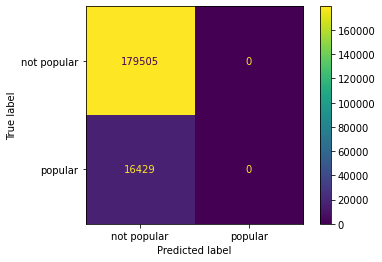

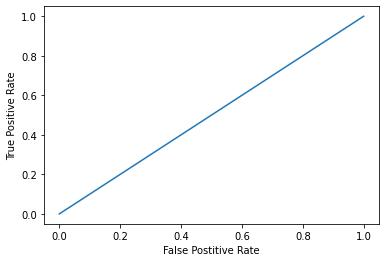

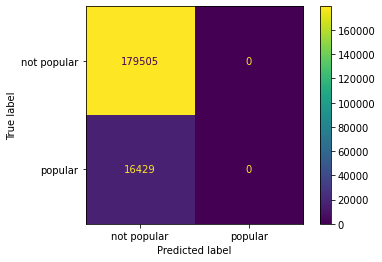

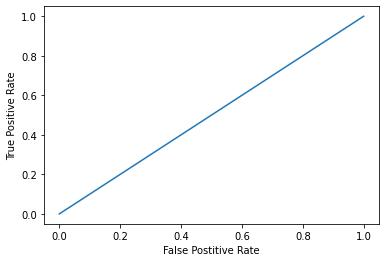

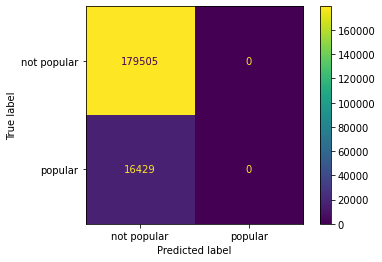

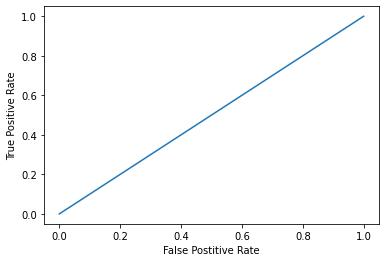

In [30]:
# evaluate classification results
plot_classification_metrics(labels_bin, out1[0])
plot_classification_metrics(labels_bin, out2[0])
plot_classification_metrics(labels_bin, out3[0])

In [31]:
def plot_predictions(predictions, labels):

    #define plot size
    plt.figure(figsize = (20, 5))

    # plot labels and predictions
   
    ax = [np.log(labels), np.log(predictions)]

    plt.boxplot(ax, vert = False)
    plt.yticks([1,2], ["labels", "predictions"])
    plt.xlabel("Score")

    # show graph 
    plt.show()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_19220\3803772370.py:8: RuntimeWarning: divide by zero encountered in log
  ax = [np.log(labels), np.log(predictions)]
C:\Users\Ethan\AppData\Local\Temp\ipykernel_19220\3803772370.py:8: RuntimeWarning: invalid value encountered in log
  ax = [np.log(labels), np.log(predictions)]


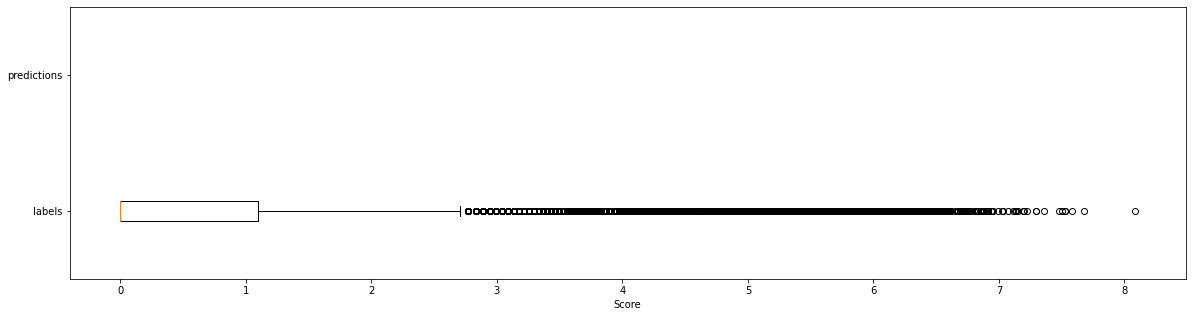

C:\Users\Ethan\AppData\Local\Temp\ipykernel_19220\3803772370.py:8: RuntimeWarning: divide by zero encountered in log
  ax = [np.log(labels), np.log(predictions)]
C:\Users\Ethan\AppData\Local\Temp\ipykernel_19220\3803772370.py:8: RuntimeWarning: invalid value encountered in log
  ax = [np.log(labels), np.log(predictions)]


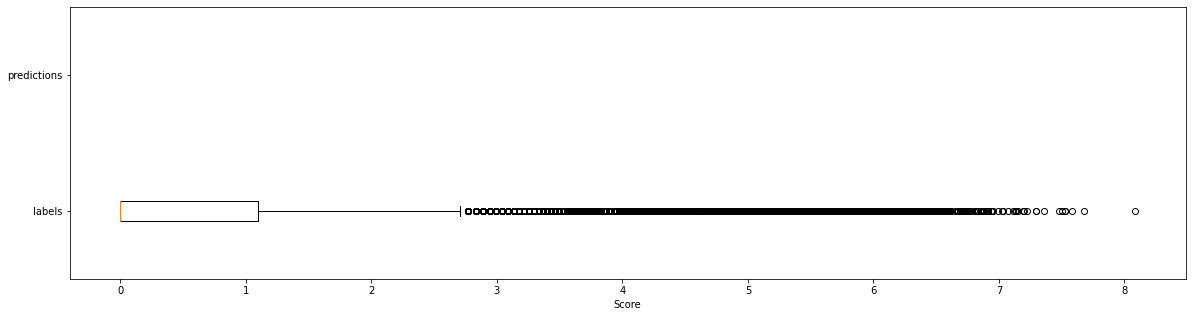

C:\Users\Ethan\AppData\Local\Temp\ipykernel_19220\3803772370.py:8: RuntimeWarning: divide by zero encountered in log
  ax = [np.log(labels), np.log(predictions)]
C:\Users\Ethan\AppData\Local\Temp\ipykernel_19220\3803772370.py:8: RuntimeWarning: invalid value encountered in log
  ax = [np.log(labels), np.log(predictions)]


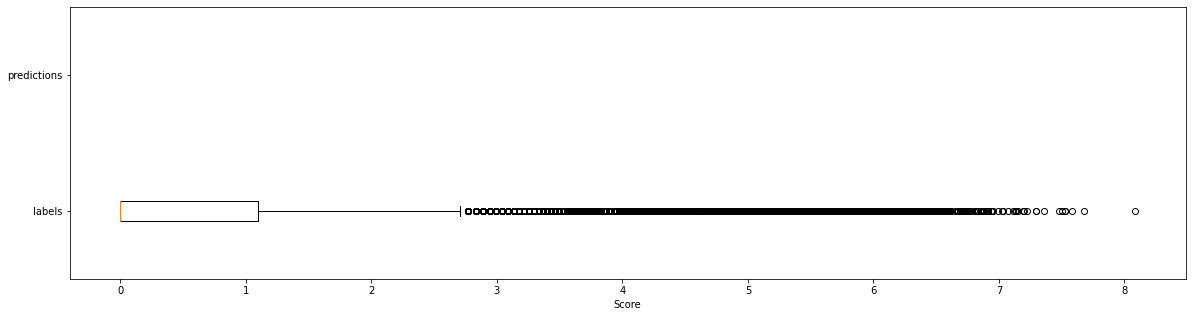

In [32]:
plot_predictions(regression_output1_vals, labels_reg)
plot_predictions(regression_output2_vals, labels_reg)
plot_predictions(regression_output1_vals, labels_reg)

In [33]:
print(regression_output1[1])
print(regression_output2[1])
print(regression_output3[1])

[14.833926808649483, 1889.1345268577934]
[14.769165869559027, 1886.9725831570834]
[14.802496984959266, 1887.7263042674647]
